In [134]:
import pathlib
import pylab as plt

#from matplotlib import pyplot as plt
import numpy as np
from numpy import unique
from numpy import where
import pandas as pd
import matplotlib
import seaborn as sns
import sys
print(sys.executable.split('miniconda3/envs/')[1])

blastasm/bin/python


In [135]:
sns.set_style('white')

In [136]:
PRJ='PRJNA793740'
BASE_PATH='/mnt/1TB_0/Data/Assembly/'
DATA_PATH=f'{BASE_PATH}{PRJ}/'
PLOT_PATH=DATA_PATH+'general_plots/'
PLOT_DATA_FILE1='bamdst_reads_PRJNA793740_v3_very-sensitive_bowtie2.csv'
PLOT_DATA_FILE2='bamdst_reads_PRJNA795267_v3_very-sensitive_bowtie2.csv'
ITERATION=1
PARAMS='very-sensitive'
N_PCT=10
#PARAMS='default'

In [137]:
PLOT_PATH

'/mnt/1TB_0/Data/Assembly/PRJNA793740/general_plots/'

In [138]:
df_accessions=pd.read_csv(PLOT_PATH+'04_Accessions_V5.tsv', sep='\t')

In [139]:
df_accessions.head()

,Accession,Code,Description,Host
0,MT121216.1,Pangolin CoV MP789,"Pangolin coronavirus isolate MP789, complete g...",Pangolin
1,MW505906.1,Pangolin respirovirus M5,"Pangolin respirovirus isolate M5, complete genome",Pangolin
2,MG772933.1,bat-SL-CoVZC45,Bat SARS-like coronavirus isolate bat-SL-CoVZC...,NaN
3,EPI_ISL_410538,GX_P4L,hCoV-19/pangolin/Guangxi/P4L/2017|EPI_ISL_4105...,NaN
4,EPI_ISL_410539,GX_P1E,hCoV-19/pangolin/Guangxi/P1E/2017|EPI_ISL_4105...,NaN


In [140]:
df_accessions['Accession']=df_accessions['Accession'].str.strip()

### datasets

In [141]:
df_datasets=pd.read_csv(PLOT_PATH+'02_Datasets_V5.tsv', sep='\t')

In [142]:
df_datasets.head()

,BioProject,SRA,Sample,Avg_spot_len,Bases,Bytes,Collection_date,Experiment,geo_loc_name,Host,Isolate,LibraryName,Library_layout,Release_date,Sample_name,sample_type
0,PRJNA795267,SRR17497116,SAMN24587080,286,4.01 G,1.31 Gb,2020-05-24,SRX13667251,China:Fujian,Hystrix brachyura,HB-FJ-NA-7,HB-FJ-NA-7,SINGLE,2022-01-08,HB-FJ-NA-7,Nasal swab + Anal swab
1,PRJNA793740,SRR17481206,SAMN24587188,292,3.15 G,1.06 Gb,2019-07-22,SRX13651739,China:Zhejiang,Manis javanica,MJ-ZJ-MO-2,MJ-ZJ-MO-2,PAIRED,2022-01-07,MJ-ZJ-MO-2,Mixed organs
2,PRJNA793740,SRR17509911,SAMN24587201,284,6.81 G,2.18 Gb,2019-09-14,SRX13680284,China:Zhejiang,Manis pentadactyla,MP-ZJ-MO-4,MP-ZJ-MO-4,SINGLE,2022-01-09,MP-ZJ-MO-4,Mixed organs
3,PRJNA793740,SRR17509939,SAMN24587187,293,5.99 G,1.89 Gb,2019-07-19,SRX13680256,China:Zhejiang,Manis javanica,MJ-ZJ-MO-1,MJ-ZJ-MO-1,SINGLE,2022-01-09,MJ-ZJ-MO-1,Mixed organs
4,PRJNA793740,SRR17481195,SAMN24587189,286,3.18 G,"1,022.31 Mb",2019-07-13,SRX13651750,China:Zhejiang,Manis javanica,MJ-ZJ-MO-3,MJ-ZJ-MO-3,PAIRED,2022-01-07,MJ-ZJ-MO-3,Mixed organs


## Read in CoV alignments

In [143]:

dfs=[]

df=pd.read_csv(PLOT_PATH+PLOT_DATA_FILE1)
df['BioProject']=['PRJNA793740']*len(df)
df['Accession']=df['Accession'].str.strip()
df=df.rename(columns=lambda x: x.strip())
dfs.append(df)
df=pd.read_csv(PLOT_PATH+PLOT_DATA_FILE2)
df['BioProject']=['PRJNA795267']*len(df)
df['Accession']=df['Accession'].str.strip()
df=df.rename(columns=lambda x: x.strip())
dfs.append(df)
df= pd.concat(dfs)


In [144]:
df_all=df

In [145]:
df_all=df_all.rename(columns=lambda x: x.strip())
len(df_all)

730

In [146]:
df_all.rename(columns = {'Accession':'Virus'}, inplace = True)

In [147]:
df_all.head()

,Virus,ref_length,N,DATA(%),Avg depth,Median,Coverage%,Cov 4x %,Cov 10x %,Cov 30x %,Cov 100x %,SRA,BioProject
0,AC_000007.1,35937,171,0.00,0.70,0.0,9.27,5.60,2.70,0.07,0.00,SRR17481206,PRJNA793740
1,NC_026428.1,841,2,0.00,0.35,0.0,17.62,0.00,0.00,0.00,0.00,SRR17481206,PRJNA793740
2,NC_001354.1,7614,55,0.00,1.07,0.0,21.77,16.06,2.50,0.00,0.00,SRR17481206,PRJNA793740
3,NC_003443.1,15646,7839,0.12,67.65,3.0,77.07,41.51,24.41,10.77,5.78,SRR17481206,PRJNA793740
4,NC_006579.1,14885,31,0.00,0.31,0.0,17.58,0.69,0.00,0.00,0.00,SRR17481206,PRJNA793740


In [148]:
len(list(set(df_all.SRA.tolist())))

46

In [149]:
df_all['N'] = df_all['N'].astype(int)

In [150]:
df_all.dtypes

Virus          object
ref_length      int64
N               int64
DATA(%)       float64
Avg depth     float64
Median        float64
Coverage%     float64
Cov 4x %      float64
Cov 10x %     float64
Cov 30x %     float64
Cov 100x %    float64
SRA            object
BioProject     object
dtype: object

In [151]:
df_all.shape

(730, 13)

In [152]:
df_temp = df_all.loc[df_all['Coverage%'] >=N_PCT]
gt_10_asc=list(set(df_temp['Virus'].tolist()))
#add SV40
gt_10_asc.append('GX_ZC45r')
gt_10_asc.append('NC_001669.1')


In [153]:
df_pivot=df_all.pivot_table(index='SRA', columns='Virus', values='N')

#cut to N pct + addtional viruses
df_pivot=df_pivot[df_pivot.columns[df_pivot.columns.isin(gt_10_asc)]]

In [154]:
df_pivot.shape

(46, 52)

Order ~ by host

In [155]:

#df_pivot.rename(columns = {'hCoV-19/pangolin/Guangxi/P1E/2017|EPI_ISL_410539|2017':'EPI_ISL_410539'}, inplace = True)


In [156]:
order_by=df_accessions['Accession'].tolist()
cols=df_pivot.columns.tolist()
reorder_cols=[]
for o in order_by:
    for c in cols:
        if o.strip()==c.strip(): 
            reorder_cols.append(c)

In [157]:
assert set(reorder_cols) == set(df_pivot.columns)

In [158]:
df_pivot=df_pivot.reindex(columns= reorder_cols)

In [159]:
def remove_specific_cols(df_pivot):
    #Influenza B only in one SRA
    influenza_b=['NC_002211.1','NC_002210.1','NC_002207.1','NC_002208.1','NC_002204.1',\
                 'NC_002205.1','NC_002206.1','NC_002209.1']
    influenza_a=['NC_026422.1','NC_026427.1','NC_026437.1','NC_004912.1','NC_007359.1','NC_007380.1',\
                 'NC_007370.1','NC_004905.2','NC_004907.1','NC_004908.1','NC_004910.1','NC_002020.1',\
                 'NC_002023.1','NC_002022.1','NC_007381.1','NC_002017.1','NC_002016.1','NC_026424.1',\
                 'NC_026423.1','NC_026426.1','NC_007367.1','NC_007375.1','NC_007377.1','NC_026425.1',\
                 'NC_026428.1','NC_026433.1','NC_026434.1','NC_004909.1','NC_007360.1']
    misc_cov=['NC_009657.1']
    ib_cols_to_del = [col for col in influenza_b if col in df_pivot.columns.values]
    df_pivot=df_pivot.drop(ib_cols_to_del, axis = 1)
    ia_cols_to_del = [col for col in influenza_a if col in df_pivot.columns.values]
    df_pivot=df_pivot.drop(ia_cols_to_del, axis = 1)
    misc_cols_to_del = [col for col in misc_cov if col in df_pivot.columns.values]
    df_pivot=df_pivot.drop(misc_cols_to_del, axis = 1)
    return df_pivot

In [160]:
df_pivot=remove_specific_cols(df_pivot)

In [161]:
data=df_pivot.to_numpy()

In [162]:
def get_samples(y_labels, df_datasets):
    y_names=[]
    for sra in y_labels:
        y_names.append(df_datasets.loc[df_datasets['SRA'] == sra.strip(), 'LibraryName'].values[0])
    return y_names

In [163]:
def get_accessions(x_labels, df_accessions):
    x_codes=[]
    for accession in x_labels:
        x_codes.append(df_accessions.loc[df_accessions['Accession'] == accession.strip(), 'Code'].values[0])
    return x_codes

In [164]:
df_accessions.head(n=100)

,Accession,Code,Description,Host
0,MT121216.1,Pangolin CoV MP789,"Pangolin coronavirus isolate MP789, complete g...",Pangolin
1,MW505906.1,Pangolin respirovirus M5,"Pangolin respirovirus isolate M5, complete genome",Pangolin
2,MG772933.1,bat-SL-CoVZC45,Bat SARS-like coronavirus isolate bat-SL-CoVZC...,NaN
3,EPI_ISL_410538,GX_P4L,hCoV-19/pangolin/Guangxi/P4L/2017|EPI_ISL_4105...,NaN
4,EPI_ISL_410539,GX_P1E,hCoV-19/pangolin/Guangxi/P1E/2017|EPI_ISL_4105...,NaN
...,...,...,...,...
95,NC_021190.1,phage phi80,"Enterobacteria phage phi80, complete genome",Bacteria
96,NC_032874.1,Changjiang crawfish virus 1,Changjiang crawfish virus 1 strain CJLX30787 h...,NaN
97,NC_040540.1,Sarawak virus,Sarawak virus strain SWK-M26,NaN
98,NC_003215.1,Semliki forest virus,Semliki forest virus,NaN


In [165]:
df_pivot.head()

Virus,GX_ZC45r,NC_003443.1,MH892406.1,NC_001457.1,NC_001576.1,NC_001354.1,NC_022518.1,NC_014406.1,AC_000007.1,NC_006152.1,...,NC_006430.1,NC_038922.1,NC_005947.1,NC_038923.1,NC_003436.1,NC_032874.1,NC_040540.1,NC_001802.1,NC_001669.1,NC_004107.1
SRA,,,,,,,,,,,,,,,,,,,,,
SRR17481184,2.0,13.0,1787.0,1433.0,196.0,36.0,3097.0,26.0,349.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR17481195,54.0,1230.0,1381282.0,364.0,37.0,2.0,383.0,NaN,57.0,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
SRR17481206,208.0,7839.0,6214921.0,2365.0,90.0,55.0,724.0,8.0,171.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,18.0
SRR17481234,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,200.0,10.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR17481242,NaN,NaN,NaN,83.0,9.0,NaN,110.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


#### Normalize N counts

In [336]:
def read_counts(prjna_code):
    header=['sra','count']
    trimmed_counts=pd.read_csv(PLOT_PATH+f'{prjna_code}_trimmed_counts.csv', names=header)
    #print(trimmed_counts.head())
    paired_counts=pd.read_csv(PLOT_PATH+f'{prjna_code}_paired_counts.csv', names=header)
    #print(paired_counts.head())
    trimmed_counts['sra'] = trimmed_counts.sra.str.replace('_trimmed.fq' , '')
    paired_counts['sra'] = paired_counts.sra.str.replace('_2_val_2.fq' , '')
    paired_counts['sra'] = paired_counts.sra.str.replace('_1_fastp.fq' , '')
    paired_counts['sra'] = paired_counts.sra.str.replace('_2_fastp.fq' , '')
    trimmed_counts.drop_duplicates(subset=None, keep='first', inplace=True)
    
    paired_counts.drop_duplicates(subset=None, keep='first', inplace=True)
    #paired reads so need 2x
    paired_counts['count'] *= 2
       
    paired_sras=list(set(paired_counts['sra'].tolist()))
    trimmed_sras=list(set(trimmed_counts['sra'].tolist()))
    add_sras=list(set(trimmed_sras) - set(paired_sras))
    add_trimmed_sras=trimmed_counts[trimmed_counts['sra'].isin(add_sras)]
    df_all_sras = pd.concat([paired_counts, add_trimmed_sras], axis = 0, sort = False)
    return df_all_sras

In [337]:
def normalise_counts(df_pivot):
    df_3740=read_counts('PRJNA793740')
    df_5267=read_counts('PRJNA795267')
    df_all_sras = pd.concat([df_3740, df_5267], axis = 0, sort = False)
    df_all_sras=df_all_sras[df_all_sras['sra'].isin(df_pivot.index)]
    #remove duplaces in sra column, keep first row
    df_all_sras = df_all_sras.drop_duplicates(subset=['sra'], keep='first')
    sra_all_sras=df_all_sras['sra'].tolist()
    sra_pivot=df_pivot.index.tolist()

    assert len(df_all_sras)==len(df_pivot)
    #sort by df_pivot index (sra)
    df_all_sras['_cat'] = pd.Categorical(df_all_sras['sra'], 
        categories=df_pivot.index, ordered=True)
    df_all_sras=df_all_sras.sort_values('_cat')
    df_all_sras.drop('_cat', axis=1, inplace=True)

    counts=pd.Series(df_all_sras['count'])
    cols=list(df_pivot)
    np_counts=counts.to_numpy()
    np_pivot=df_pivot.to_numpy()
    np_pivot = (np_pivot.T / np_counts).T
    
    df_norm = pd.DataFrame(np_pivot, columns = df_pivot.columns, index=df_pivot.index)
    #print(df_norm.head())
    #print(df_pivot.head())


    return df_norm

In [338]:
df_norm=normalise_counts(df_pivot)

In [339]:
data_norm=df_norm.to_numpy()

In [340]:
x_labels=list(df_pivot.columns.values)
x_codes=get_accessions(x_labels, df_accessions)

In [341]:

y_labels=df_pivot.index.tolist()
y_names=get_samples(y_labels, df_datasets)

### Plot Counts

In [342]:
plot_data = np.ma.masked_equal(data_norm[:,:], 0)

In [343]:
GX_ZC45_CoV_SRAs=['HB-FJ-NA-7','MJ-ZJ-MO-2','MP-ZJ-MO-4','MJ-ZJ-MO-1','MJ-ZJ-MO-3','HB-HuB-N-3','RP-JX-A-2','HB-FJ-NA-3','MC-HuN-T-1','HB-HuB-A-1','ML-HeB-F-1','MJ-ZJ-MO-6','MJ-ZJ-MO-4','HB-HuB-A-2','MC-HeB-T-1','PL-AH-MO-5']

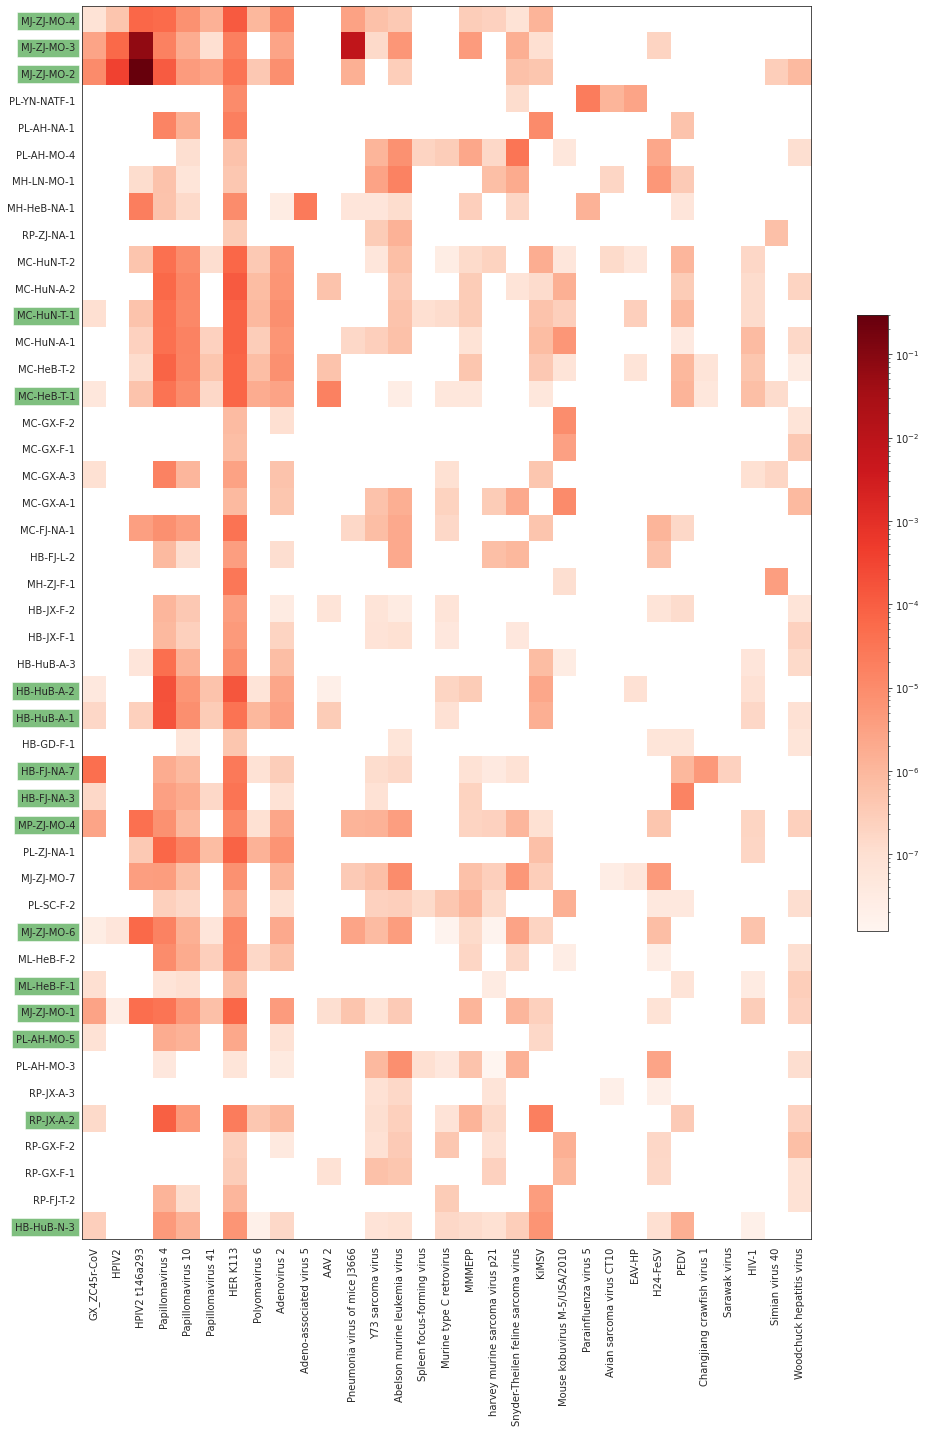

In [344]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,20))
img=ax.imshow(plot_data, cmap=plt.cm.get_cmap("Reds"), interpolation="nearest", aspect='auto',norm=matplotlib.colors.LogNorm())
ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.set_yticks(list(range(len(y_names))))
ax.set_yticklabels(y_names)
for t in ax.yaxis.get_ticklabels():
    if t.get_text() in GX_ZC45_CoV_SRAs:
        t.set_bbox(dict(facecolor='green', alpha=0.5))
fig.colorbar(img, shrink=0.5)
plt.tight_layout()
fig.savefig(PLOT_PATH+f"PRJNA793740_PRJNA795267_viruses_coded_counts_log_scale_norm_{PARAMS}_highlighted_V5.png", bbox_inches='tight')

## Coverage

In [92]:
df_cov=df_all.pivot(index='SRA', columns='Virus', values='Coverage%')

#cut to N pct + addtional viruses
df_cov=df_cov[df_cov.columns[df_cov.columns.isin(gt_10_asc)]]

order_by=df_accessions['Accession'].tolist()

#df_cov.rename(columns = {'hCoV-19/pangolin/Guangxi/P1E/2017|EPI_ISL_410539|2017':'EPI_ISL_410539'}, inplace = True)


In [93]:
cols=df_cov.columns.tolist()
reorder_cols=[]
for o in order_by:
    for c in cols:
        if o.strip()==c.strip(): 
            reorder_cols.append(c)
assert len(cols)==len(reorder_cols)
df_cov=df_cov.reindex(columns= reorder_cols)

In [94]:
df_cov=remove_specific_cols(df_cov)
data_cov=df_cov.to_numpy()
plot_data_cov = np.ma.masked_equal(data_cov[:,:], 0)

In [95]:
x_labels=list(df_cov.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
y_labels=df_cov.index.tolist()
y_names=get_samples(y_labels, df_datasets)

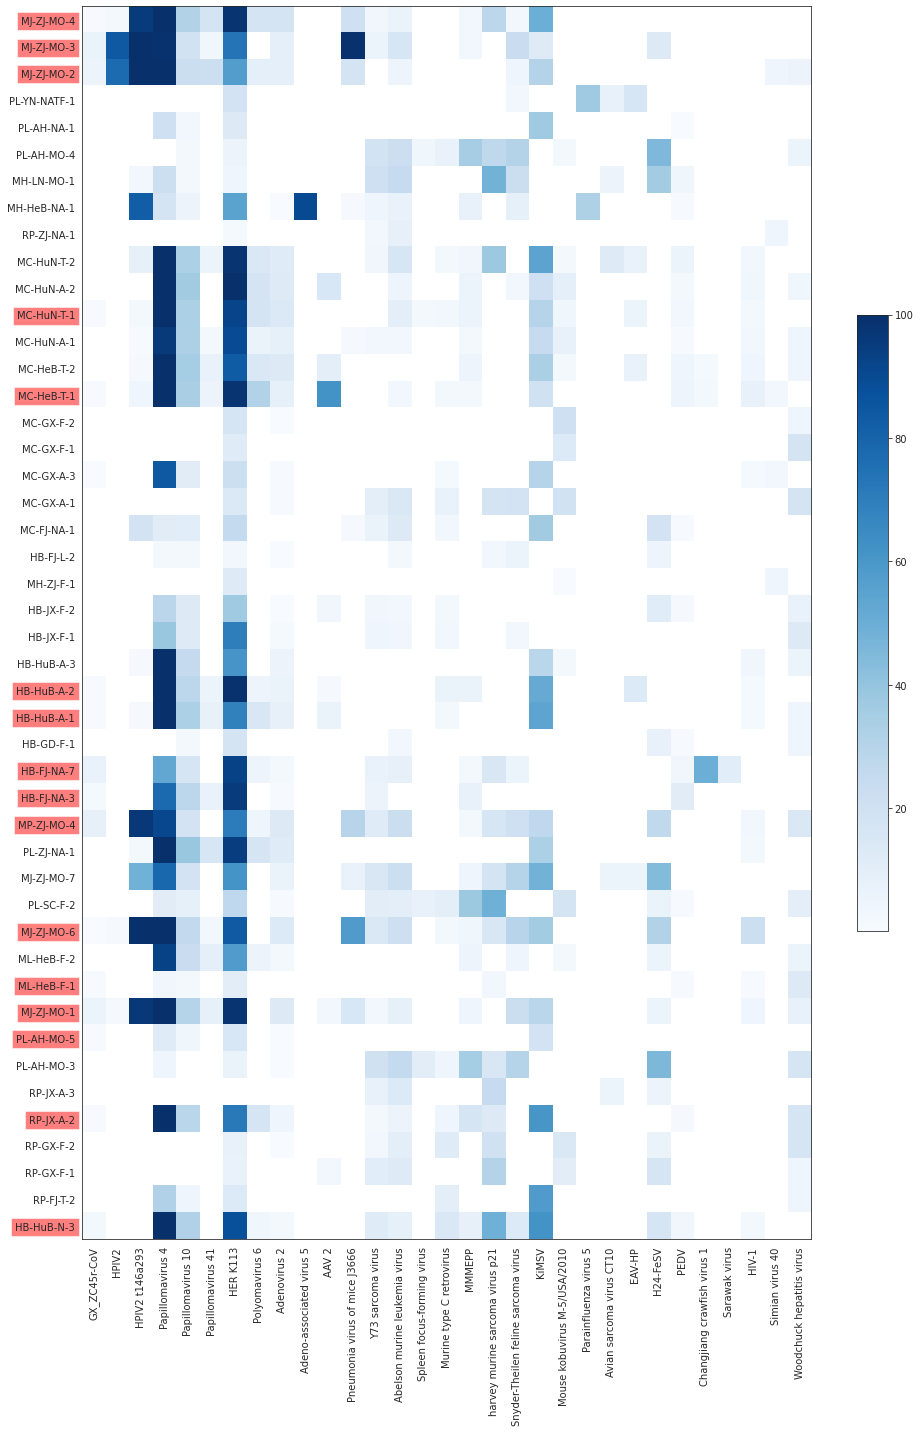

In [96]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,20))
img=ax.imshow(plot_data_cov, cmap=plt.cm.get_cmap("Blues"), interpolation="nearest", aspect='auto')
ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.set_yticks(list(range(len(y_names))))
ax.set_yticklabels(y_names)
for t in ax.yaxis.get_ticklabels():
    if t.get_text() in GX_ZC45_CoV_SRAs:
        t.set_bbox(dict(facecolor='red', alpha=0.5))
fig.colorbar(img, shrink=0.5)
plt.tight_layout()
fig.savefig(PLOT_PATH+f"PRJNA793740_PRJNA795267_viruses_coded_pct_cov_linear_scale_{PARAMS}_highlighted_V5.png", bbox_inches='tight')

## Box plots

In [345]:
df_corr=df_norm.copy()

x_labels=list(df_corr.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
y_labels=df_corr.index.tolist()
y_names=get_samples(y_labels, df_datasets)

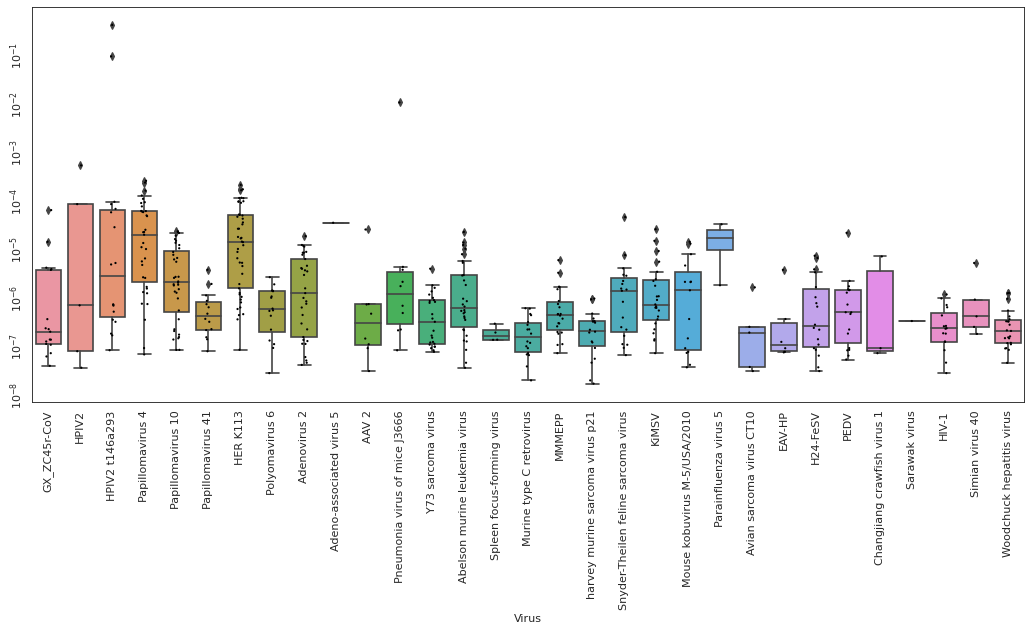

In [346]:
# Draw Plot
#plt.figure(figsize=(13,10), dpi= 200)

fig, ax = plt.subplots(1,1, figsize=(13,8), dpi= 80)
sns.boxplot(data=df_corr)
sns.stripplot(data=df_corr, color='black', size=2, jitter=1)
ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.tick_params(which='major', labelrotation=90)
ax.set_yscale("log") 
plt.tight_layout()
fig.savefig(PLOT_PATH+f"PRJNA793740_PRJNA795267_viruses_coded_box_plot_log_scale_norm_{PARAMS}_V5.png", bbox_inches='tight')

### percent box

In [52]:
df_co=df_cov.copy()
#sra_x_codes=y_codes.copy()
#sra_x_codes.insert(0,'SRA')
#df_coded.columns=sra_x_codes

In [53]:
x_labels=list(df_co.columns.values)
x_codes=get_accessions(x_labels, df_accessions)
y_labels=df_co.index.tolist()
y_names=get_samples(y_labels, df_datasets)

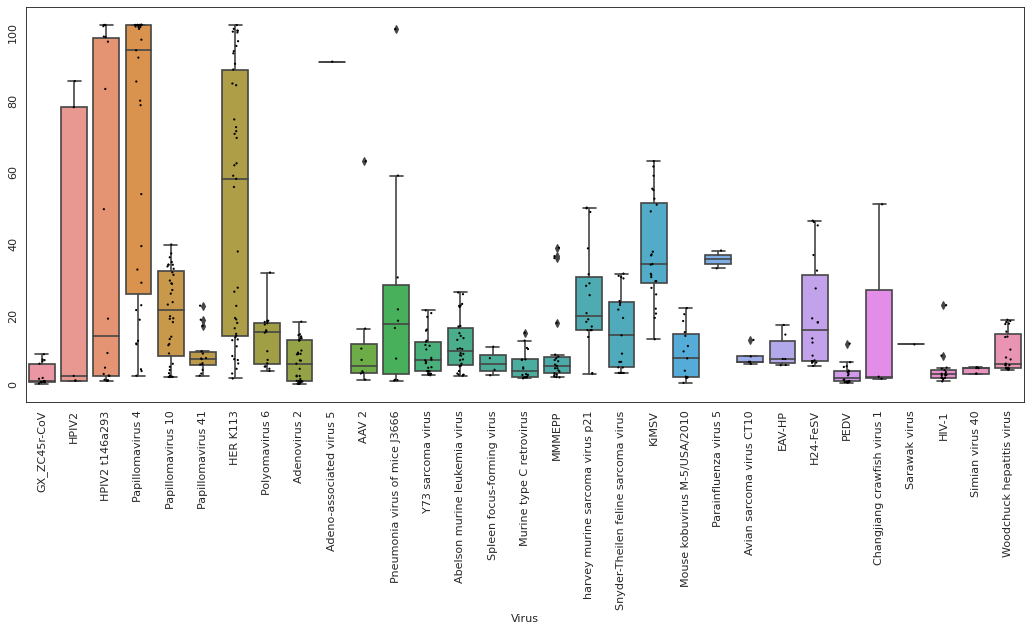

In [54]:
fig, ax = plt.subplots(1,1, figsize=(13,8), dpi= 80)
sns.boxplot(data=df_co)
sns.stripplot(data=df_co, color='black', size=2, jitter=1)
ax.set_xticks(list(range(len(x_codes))))
ax.set_xticklabels(x_codes,rotation=90)
ax.tick_params(which='major', labelrotation=90)
plt.tight_layout()
fig.savefig(PLOT_PATH+f"PRJNA793740_PRJNA795267_viruses_coded_box_plot_pct_cov_linear_scale_{PARAMS}_V5.png", bbox_inches='tight')

### Correlation

In [347]:
df_norm.head()

Virus,GX_ZC45r,NC_003443.1,MH892406.1,NC_001457.1,NC_001576.1,NC_001354.1,NC_022518.1,NC_014406.1,AC_000007.1,NC_006152.1,...,NC_006430.1,NC_038922.1,NC_005947.1,NC_038923.1,NC_003436.1,NC_032874.1,NC_040540.1,NC_001802.1,NC_001669.1,NC_004107.1
SRA,,,,,,,,,,,,,,,,,,,,,
SRR17481184,7.524416e-08,4.890870e-07,0.000067,0.000054,0.000007,1.354395e-06,0.000117,9.781741e-07,0.000013,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR17481195,2.635412e-06,6.002884e-05,0.067412,0.000018,0.000002,9.760787e-08,0.000019,NaN,0.000003,NaN,...,NaN,NaN,NaN,1.952157e-07,NaN,NaN,NaN,NaN,NaN,NaN
SRR17481206,1.004403e-05,3.785342e-04,0.300110,0.000114,0.000004,2.655872e-06,0.000035,3.863087e-07,0.000008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.897315e-07,8.691945e-07
SRR17481234,NaN,NaN,NaN,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,...,0.000023,0.000001,0.000003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SRR17481242,NaN,NaN,NaN,0.000014,0.000002,NaN,0.000019,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.083218e-07,NaN,NaN,NaN,NaN,NaN


In [348]:
df_norm_0=df_norm.fillna(0)

In [349]:
df_norm_GX = df_norm[df_norm['GX_ZC45r'] > 0]

In [350]:
df_norm_GX.shape

(17, 31)

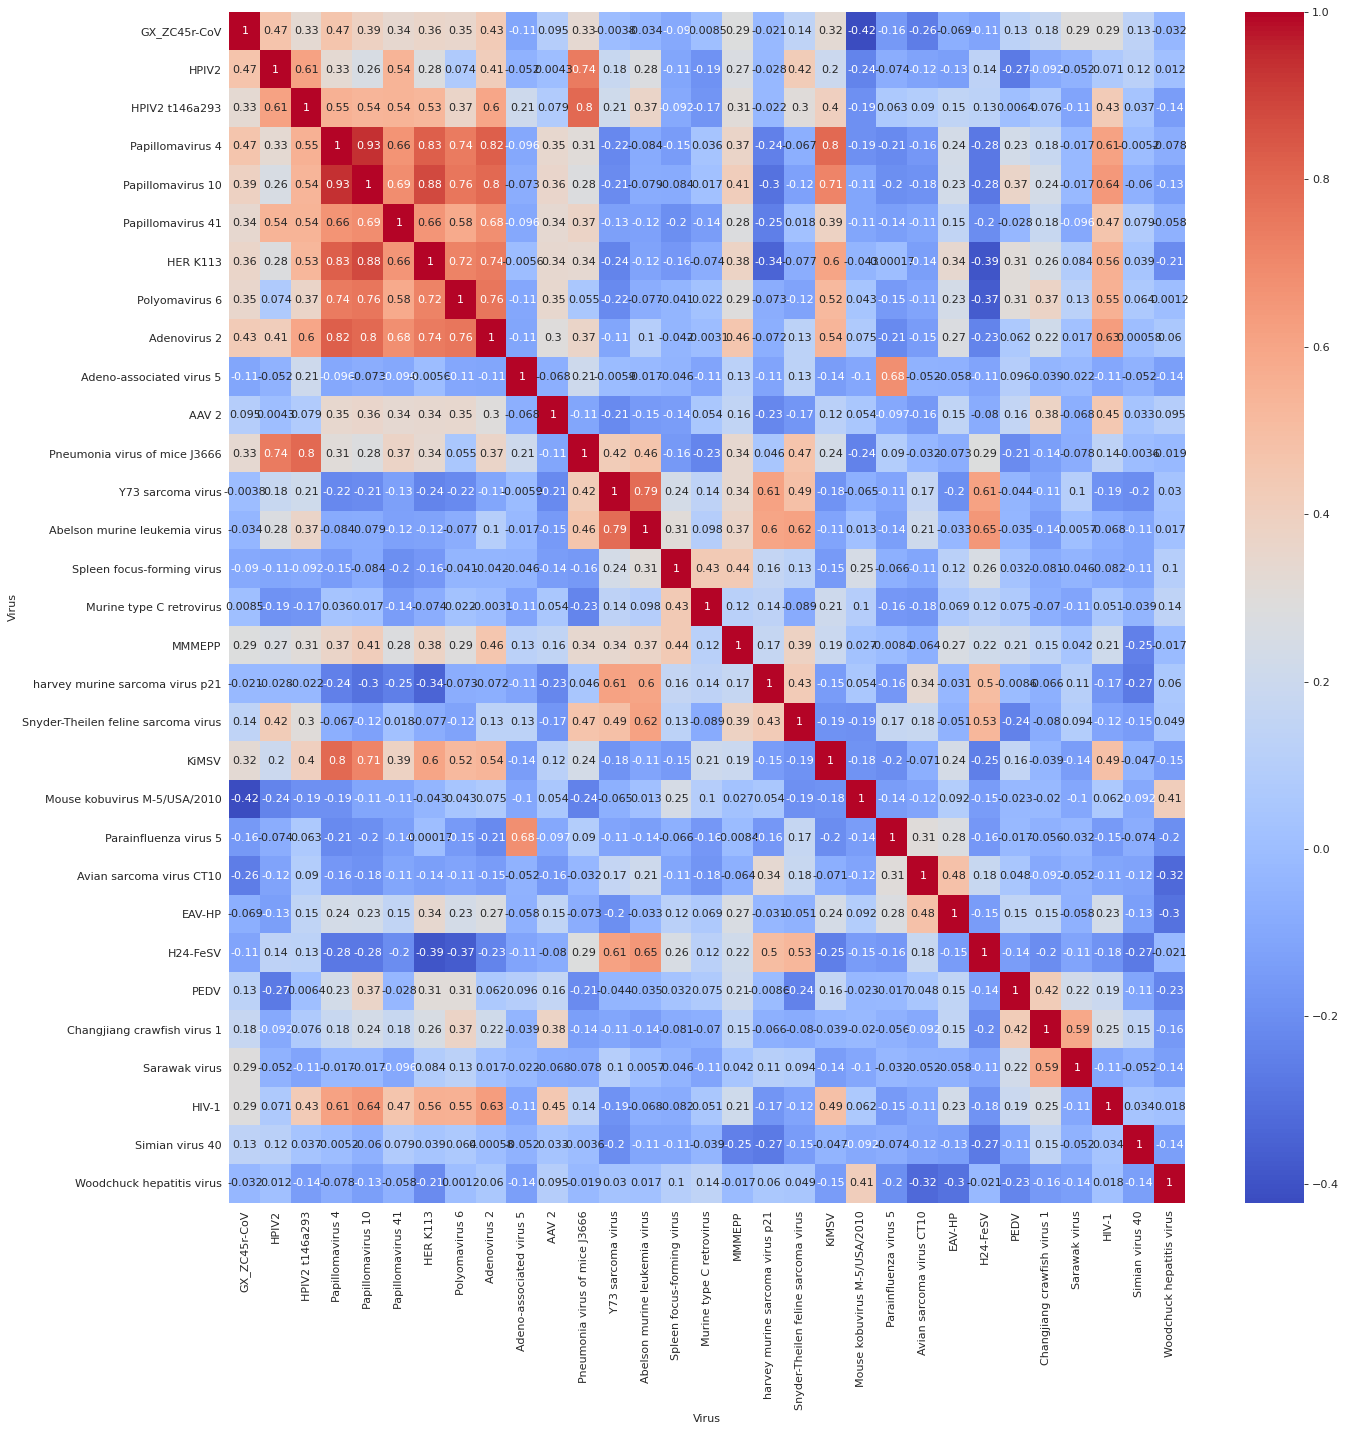

In [351]:
corr_method='spearman'
fig, ax = plt.subplots(1,1, figsize=(18, 18), dpi= 80)
#sns.set(rc={"figure.figsize":(19, 19)})
sns_plot=sns.heatmap(df_norm_0.corr(method=corr_method),annot=True, cmap='coolwarm')
fig = sns_plot.get_figure()

#ax.set_xticks(list(range(len(x_codes))))
xlabels=ax.set_xticklabels(x_codes, rotation=90)
for i, xlabel in enumerate(xlabels):
    xlabel.set_x(xlabel.get_position()[0] +50)
#ax.set_yticks(list(range(len(x_codes))))
ylabels=ax.set_yticklabels(x_codes)
for i, ylabel in enumerate(ylabels):
    ylabel.set_y(ylabel.get_position()[1] -50)

#ax.tick_params(which='major', labelrotation=90)
fig.tight_layout()
fig.savefig(PLOT_PATH+f"PRJNA793740_PRJNA795267_viruses_norm_{PARAMS}_{corr_method}_correlation.png")